In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import corner
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
#
import sys
sys.path.append('../../')
import data.datasets as datasets
from models.losses import SupervisedSimCLRLoss
#from models.networks import CustomEfficientNet
from models.networks import MLP
from models.litmodels import SimCLRModel

In [2]:
npart=4
nj_train   = 10000
nj_valid   = 5
nj_testy   = 10000
tjds       = datasets.ToyJetDataset(npart,nj_train,nj_valid,nj_testy)

xevent : 0
xevent : 1000
xevent : 2000
xevent : 3000
xevent : 4000
xevent : 5000
xevent : 6000
xevent : 7000
xevent : 8000
xevent : 9000
xevent : 0
xevent : 1000
xevent : 2000
xevent : 3000
xevent : 4000
xevent : 5000
xevent : 6000
xevent : 7000
xevent : 8000
xevent : 9000
xevent : 0
xevent : 0
xevent : 0
xevent : 1000
xevent : 2000
xevent : 3000
xevent : 4000
xevent : 5000
xevent : 6000
xevent : 7000
xevent : 8000
xevent : 9000
xevent : 0
xevent : 1000
xevent : 2000
xevent : 3000
xevent : 4000
xevent : 5000
xevent : 6000
xevent : 7000
xevent : 8000
xevent : 9000
xevent : 0
xevent : 1000
xevent : 2000
xevent : 3000
xevent : 4000
xevent : 5000
xevent : 6000
xevent : 7000
xevent : 8000
xevent : 9000
xevent : 0
xevent : 1000
xevent : 2000
xevent : 3000
xevent : 4000
xevent : 5000
xevent : 6000
xevent : 7000
xevent : 8000
xevent : 9000


In [10]:
input_dim  = tjds.train_data.shape[1]
hidden_dims= [32,32,32,16]
embed_dim  = 4
temp = 0.1
embedder   = MLP(input_dim=input_dim,hidden_dims=hidden_dims,output_dim=embed_dim,output_activation="sigmoid",dropout=0.1)#.to(device)
projector  = MLP(input_dim=embed_dim,hidden_dims=[embed_dim],output_dim=embed_dim)
model = SimCLRModel(embedder, projector)
criterion = SupervisedSimCLRLoss(temperature=temp)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.5e-2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:56<00:00,  1.13s/it]


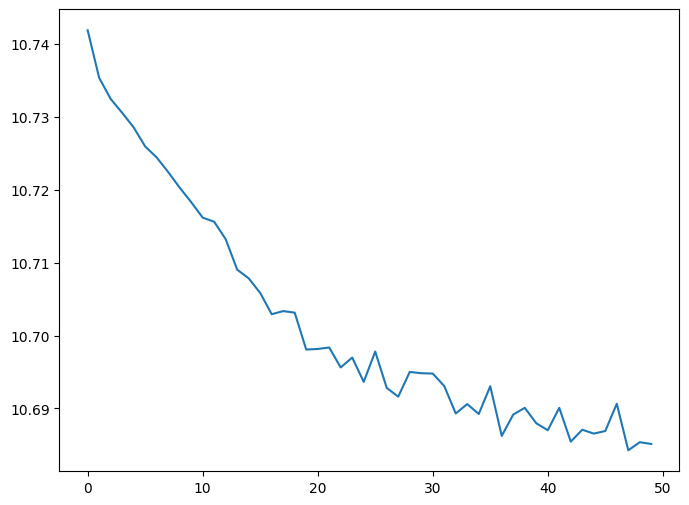

In [12]:
import data.data_utils as dutils
# Training loop
num_epochs = 50
batch_size = 2000
# Dataloaders
trainloader = torch.utils.data.DataLoader(tjds.train_dataset_basic, batch_size=batch_size, shuffle=True)
dutils.train_generic(num_epochs,trainloader,model,criterion,optimizer)

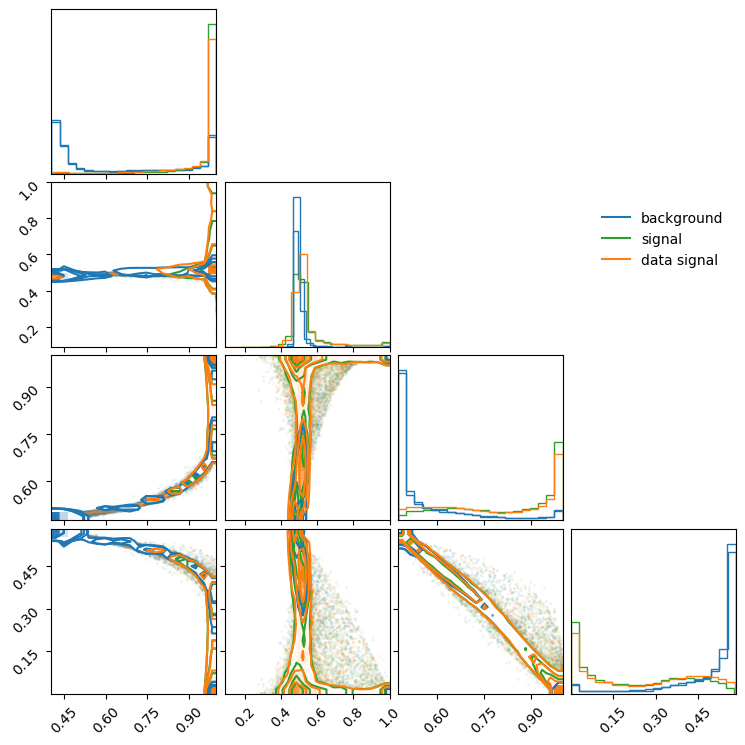

In [13]:
output = []
labels =tjds.test_labels.int()
labels1=tjds.true_labels.int()
with torch.no_grad():
    output  = (model(tjds.test_data.float(),embed=True).numpy())
    output1 = (model(tjds.true_data.float(),embed=True).numpy())

import corner
import matplotlib.lines as mlines
fig = plt.figure(figsize=(8,8))
corner.corner(output[labels==0],fig=fig,color="C0", label='background')
corner.corner(output[labels==1],fig=fig,color="C2", label='signal')
corner.corner(output1[labels1==0],fig=fig,color="C0", label='background')
corner.corner(output1[labels1==1],fig=fig,color="C1", label='daa signal')
plt.legend(
        handles=[
            mlines.Line2D([], [], color="C0", label='background'),
            mlines.Line2D([], [], color="C2", label='signal'),
            mlines.Line2D([], [], color="C1", label='data signal'),
        ],bbox_to_anchor=(1, 3),frameon=False, loc="upper right"
    )
plt.show()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:10<00:00,  4.67it/s]


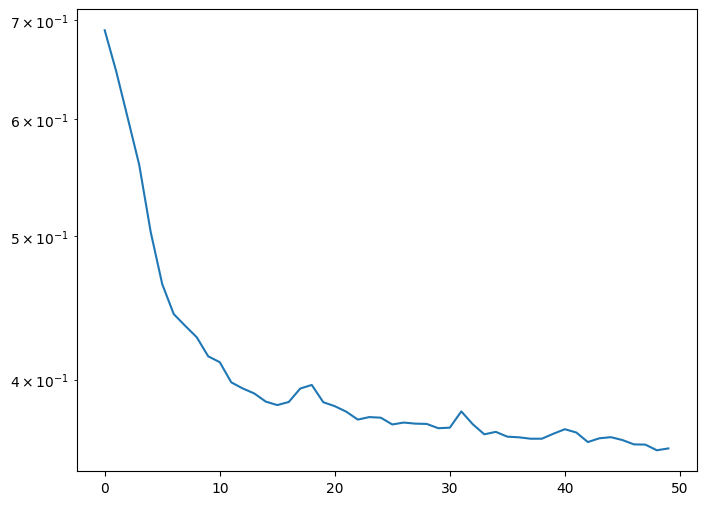

Accuracy: tensor(0.8010)


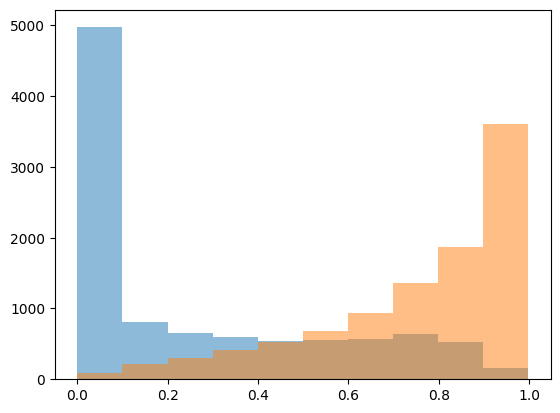

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.52it/s]


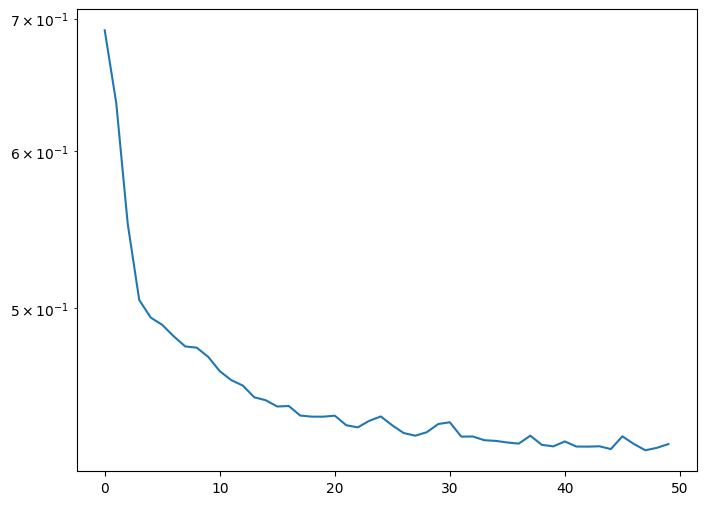

Accuracy: tensor(0.7861)


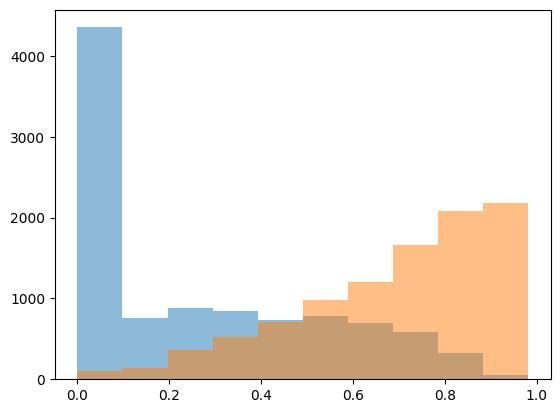

In [21]:
disc_trainloader = torch.utils.data.DataLoader(tjds.train_dataset_basic, batch_size=batch_size, shuffle=True)
disc_model=dutils.train_disc(50,disc_trainloader,input_dim)
plt.show()
dutils.check_disc(tjds.test_data,tjds.test_labels,disc_model)
plt.show()
disc_trainloader = torch.utils.data.DataLoader(tjds.true_dataset_basic, batch_size=batch_size, shuffle=True)
disc_model=dutils.train_disc(50,disc_trainloader,input_dim)
plt.show()
dutils.check_disc(tjds.true_data,tjds.true_labels,disc_model)
plt.show()

Accuracy: tensor(0.7982)


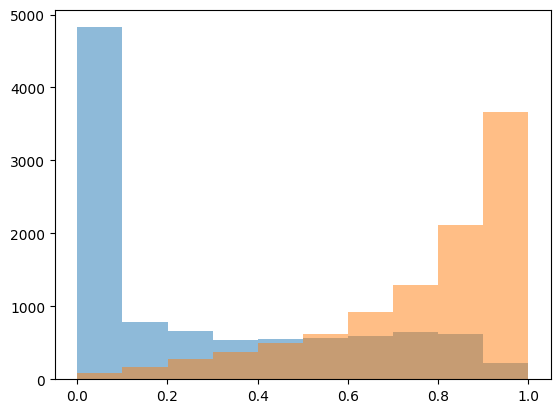